In [71]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

from fastai.vision.all import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset


In [46]:
path = untar_data(URLs.PETS)

In [49]:
fname = (path/"images").ls()[0]

In [51]:
fname.name

'Egyptian_Mau_167.jpg'

In [52]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Egyptian_Mau']

In [86]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=[*aug_transforms(do_flip=True, flip_vert=False, max_lighting=0.1, max_zoom=1.1), Resize(224)])  # ✅ crop last
dls = pets.dataloaders(path/"images", num_workers=4, bs=16)

In [90]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+\.jpg$'), 'name'),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms(size=224, do_flip=True, flip_vert=False, max_lighting=0.1, max_zoom=1.1)
)

dls = pets.dataloaders(path/"images", bs=16, num_workers=0, pin_memory=False)


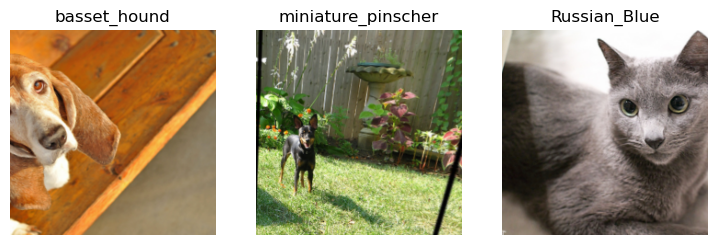

In [78]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

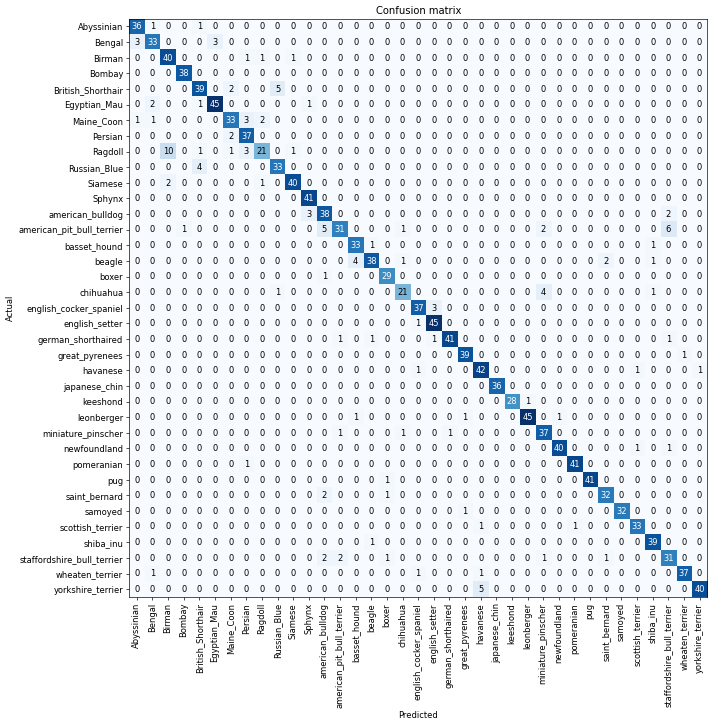

In [80]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [81]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 5),
 ('yorkshire_terrier', 'havanese', 5)]

In [91]:
learn = cnn_learner(dls, resnet34, metrics= error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,14.034467,16.265497,0.919486,01:18


epoch,train_loss,valid_loss,error_rate,time
0,3.968988,488.023865,0.956022,01:50


SuggestedLRs(valley=0.0012022644514217973)

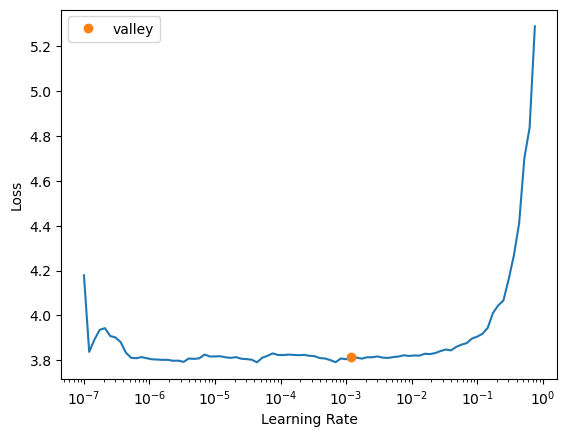

In [93]:
# Just call it to plot:
learn.lr_find()


In [ ]:
learn = cnn_learner(dls, resnet34, metrics= error_rate)
learn.fine_tune(2, base_lr=3e-3)



In [98]:
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,4.517609,5.335870,0.972260,02:06


In [100]:
learn.unfreeze()

SuggestedLRs(valley=2.511886486900039e-05)

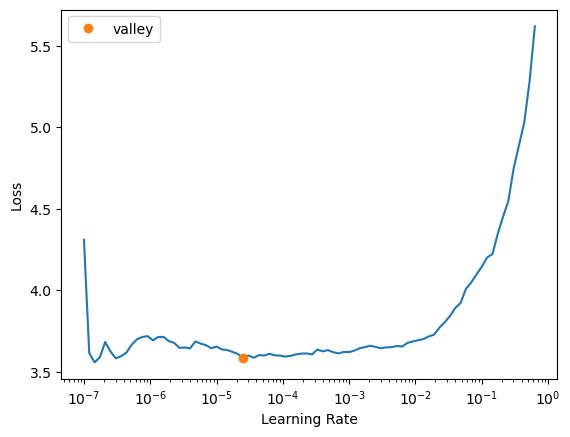

In [101]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

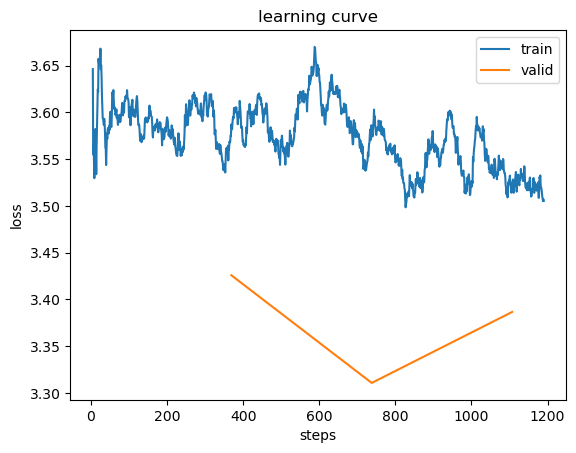

In [104]:
learn.recorder.plot_loss()

In [ ]:

learn = cnn_learner(dls, resnet34, metrics= error_rate).to_fp16()

In [ ]:
learn.fine_tune(6, freeze_epochs=3)